In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraried
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

import requests
from pandas.io.json import json_normalize
import json

from functools import reduce

#### Task 1: Predict the winner of the tournament.
#### Task 2: Predict the top team in the points table after the completion of the league matches.
#### Task 3: Predict the team with the highest points for successful raids.
#### Task 4: Predict the team with the highest points for successful tackles. 
#### Task 5: Predict the team with the highest super-performance total. 
#### Task 6: Predict the player with the highest SUCCESSFUL RAID percentage.
#### Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage. 

In [3]:
# Get the data from Pro Kabaddi League website

totalPointsUrl = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/1_49_96_stats.json"
teamRaidsUrl = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/1_49_13_stats.json"
teamTackelsUrl = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/1_49_15_stats.json"
playerRaidsUrl = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/1_49_21_stats.json"
playerTackelsUrl = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/1_49_23_stats.json"
teamAllOutsUrl = "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/1_49_136_stats.json"

season1 = "https://www.prokabaddi.com/sifeeds/kabaddi/live/json/1_season.json"
season2 = "https://www.prokabaddi.com/sifeeds/kabaddi/live/json/2_season.json"
season3 = "https://www.prokabaddi.com/sifeeds/kabaddi/live/json/3_season.json"
season4 = "https://www.prokabaddi.com/sifeeds/kabaddi/live/json/4_season.json"
season5 = "https://www.prokabaddi.com/sifeeds/kabaddi/live/json/multisport_cache_25_3_pkl_0530_en_8.json"
season6 = "https://www.prokabaddi.com/sifeeds/kabaddi/live/json/multisport_cache_25_3_pkl_0530_en_26.json"
season7 = "https://www.prokabaddi.com/sifeeds/kabaddi/live/json/multisport_cache_25_3_pkl_0530_en_49.json"

totalPointsResp = requests.get(url=totalPointsUrl)
teamRaidsResp = requests.get(url=teamRaidsUrl)
teamTackelsResp = requests.get(url=teamTackelsUrl)
playerRaidsResp = requests.get(url=playerRaidsUrl)
playerTackelsResp = requests.get(url=playerTackelsUrl)
teamAllOutsResp = requests.get(url=teamAllOutsUrl)
season1Resp = requests.get(url=season1)
season2Resp = requests.get(url=season2)
season3Resp = requests.get(url=season3)
season4Resp = requests.get(url=season4)
season5Resp = requests.get(url=season5)
season6Resp = requests.get(url=season6)
season7Resp = requests.get(url=season7)

In [4]:
# Load Json data to Data Frame
def getData(jsonResp, colName):
    jsonResp = json_normalize(jsonResp.json()['data'])
    jsonResp.rename(columns={'value':colName }, inplace=True)
    return jsonResp

In [5]:
# Function for normalizing the columm values
def normaliseData(column):
    scaler = MinMaxScaler()
    values = scaler.fit_transform(column)
    return values

#### Total points calculation for team wise

In [7]:

totalPoints = getData(totalPointsResp, 'total_points')
totalPoints = totalPoints.drop(['rank'],axis=1)
totalPoints['points_n'] = normaliseData(totalPoints[['total_points']])
totalPoints.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,match_played,team_id,team_name,total_points,points_n
0,20,2,Dabang Delhi K.C.,742,1.000000
1,20,4,Bengal Warriors,718,0.874346
2,19,1,Bengaluru Bulls,656,0.549738
3,20,7,Puneri Paltan,652,0.528796
4,19,28,Haryana Steelers,650,0.518325


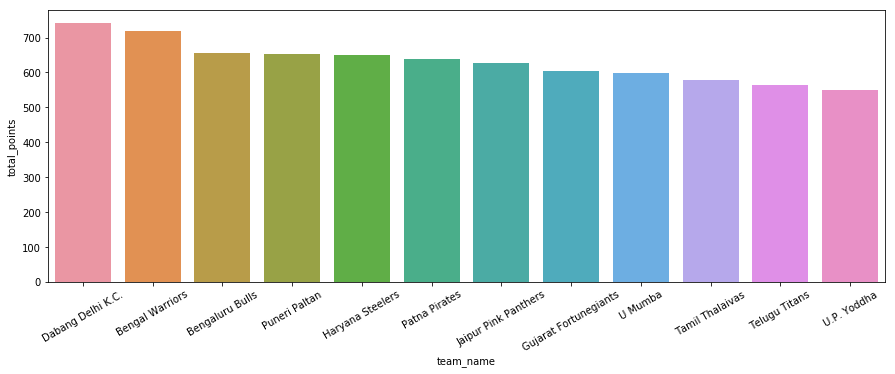

In [8]:
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
g = sns.barplot(x="team_name", y="total_points", data=totalPoints)

#### Team raid points

In [9]:

teamRaids = getData(teamRaidsResp, 'raids')
teamRaids = teamRaids.drop(['rank'],axis=1)
teamRaids['raids_n'] = normaliseData(teamRaids[['raids']])
teamRaids

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,match_played,team_id,team_name,raids,raids_n
0,20,2,Dabang Delhi K.C.,361,1.000000
1,20,4,Bengal Warriors,340,0.847826
2,19,1,Bengaluru Bulls,309,0.623188
3,19,6,Patna Pirates,291,0.492754
4,20,7,Puneri Paltan,290,0.485507
5,19,28,Haryana Steelers,290,0.485507
6,20,29,Tamil Thalaivas,275,0.376812
7,18,8,Telugu Titans,273,0.362319
8,20,31,Gujarat Fortunegiants,265,0.304348
9,20,3,Jaipur Pink Panthers,261,0.275362


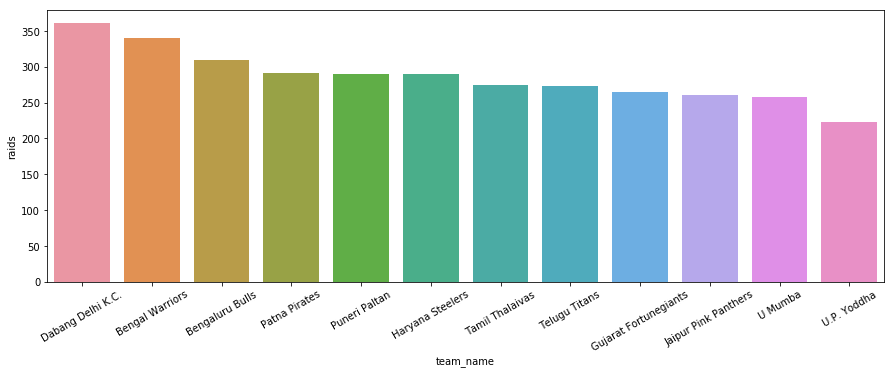

In [10]:
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
g = sns.barplot(x="team_name", y="raids", data=teamRaids)

#### Team tackels

In [11]:
teamTackels = getData(teamTackelsResp, 'tackels')
teamTackels = teamTackels.drop(['rank'],axis=1)
teamTackels['tackels_n'] = normaliseData(teamTackels[['tackels']])
teamTackels.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,match_played,team_id,team_name,tackels,tackels_n
0,20,7,Puneri Paltan,207,1.000000
1,20,3,Jaipur Pink Panthers,189,0.617021
2,20,31,Gujarat Fortunegiants,187,0.574468
3,20,4,Bengal Warriors,182,0.468085
4,20,2,Dabang Delhi K.C.,181,0.446809


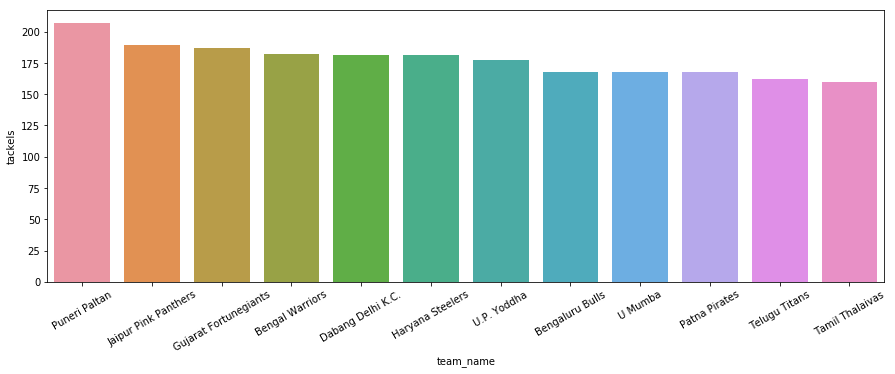

In [12]:
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
g = sns.barplot(x="team_name", y="tackels", data=teamTackels)

#### Player Raids
### Naveen kumar have more points

In [13]:
playerRaids = getData(playerRaidsResp, 'raids')
playerRaids = playerRaids[['match_played', 'player_id', 'player_name', 'team_full_name', 'team_id', 'raids']]
playerRaids['p_raids_n'] = normaliseData(playerRaids[['raids']])
playerRaids.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,match_played,player_id,player_name,team_full_name,team_id,raids,p_raids_n
0,20,2296,Naveen Kumar,Dabang Delhi K.C.,2,213,1.000000
1,19,197,Pardeep Narwal,Patna Pirates,6,190,0.891509
2,19,318,Pawan Kumar Sehrawat,Bengaluru Bulls,1,187,0.877358
3,20,143,Maninder Singh,Bengal Warriors,4,171,0.801887
4,18,2026,Siddharth Sirish Desai,Telugu Titans,8,143,0.669811


#### Player Tackel points
### Sandeep kumar dhull and sumit have more points

In [14]:
playerTackels = getData(playerTackelsResp, 'tackels')
playerTackels = playerTackels[['match_played', 'player_id', 'player_name', 'team_full_name', 'team_id', 'tackels']]
playerTackels['p_tackels_n'] = normaliseData(playerTackels[['tackels']])
playerTackels.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,match_played,player_id,player_name,team_full_name,team_id,tackels,p_tackels_n
0,20,290,Sandeep Kumar Dhull,Jaipur Pink Panthers,3,60,1.000000
1,18,2330,Sumit,U.P. Yoddha,30,60,1.000000
2,20,157,Ravinder Pahal,Dabang Delhi K.C.,2,57,0.949153
3,19,259,Fazel Atrachali,U Mumba,5,57,0.949153
4,20,621,Baldev Singh,Bengal Warriors,4,54,0.898305


#### Team All outs points
### Dabang delhi have more points

In [16]:
teamAllOuts = getData(teamAllOutsResp, 'total')
teamAllOuts['all_out_points'] = teamAllOuts['total'] * 3
teamAllOuts['all_out_points_n'] = normaliseData(teamAllOuts[['total']])
teamAllOuts.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,match_played,rank,team_id,team_name,total,all_out_points,all_out_points_n
0,20,1,2,Dabang Delhi K.C.,34,102,1.000000
1,20,1,4,Bengal Warriors,34,102,1.000000
2,19,3,6,Patna Pirates,28,84,0.714286
3,19,4,28,Haryana Steelers,27,81,0.666667
4,19,5,5,U Mumba,26,78,0.619048


In [17]:
#team_raids normalise
#team tackels normalise
#player_raids group_by avg or sum
#player_tackels groupy_by
# team total
#historical data team 1 and team 2 adding

#### Correlation for the team points
#### All out points variable is highly correlated with total points 

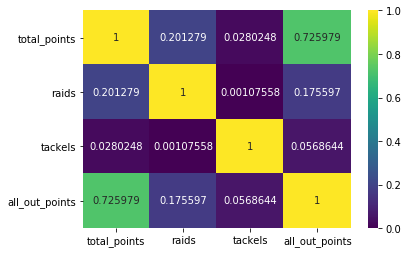

In [20]:
dfs = [
    totalPoints[['team_id', 'total_points']],
    playerRaids[['team_id', 'raids']],
    playerTackels[['team_id', 'tackels']],
    teamAllOuts[['team_id', 'all_out_points', 'team_name']]
]
df2 = df_final = reduce(lambda left,right: pd.merge(left,right,on='team_id', how='inner'), dfs)
df2 = df2.drop(columns=['team_id'],axis=1)
sns.heatmap(df2.corr(), annot=True, fmt="g", cmap='viridis')
plt.show()

#### Mergingn all the seasons data in to one data fram

In [26]:
def getSeasonMatches(jsonResp):
    jsonResp = json_normalize(jsonResp.json()['matches'])
    season = jsonResp
    dfs1 = pd.DataFrame(season)
    dfs1 = dfs1[['venue_id', 'participants']]
    lst_dict = []  
    for index, row in dfs1.iterrows():
        lst_dict.append(
            {'match': "%s-%s" % (row['participants'][0]['name'],row['participants'][1]['name']),
             'result': 1 if 'highlight' in row['participants'][0] else 0,
             'win_points': row['participants'][0]['value'],
             'team_id': row['participants'][0]['id'],
             'venue_id': row['venue_id']
            })
    
    match = pd.DataFrame(lst_dict)
    
    return match

In [27]:
file_list = list() 
for file in [season1Resp,season2Resp,season3Resp,season4Resp,season5Resp,season6Resp]:
    file_list.append(getSeasonMatches(file))
    seasonsData = pd.concat(file_list,axis=0,ignore_index=True)  

#### Correlation for All the seasons data 
#### Total points and result are highly correlated and next to that raids 

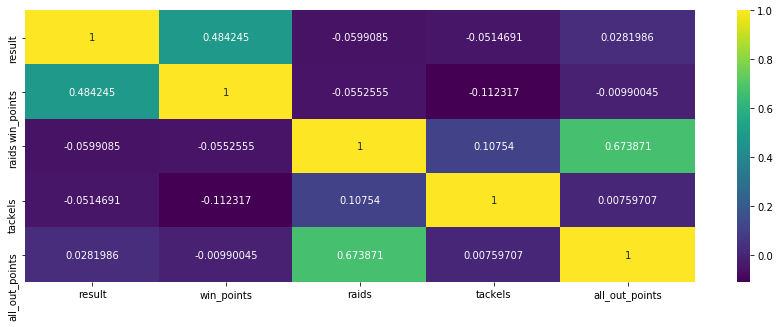

In [28]:
train = seasonsData
train.win_points = train.win_points.astype(int)
train.team_id = train.team_id.astype(int)
train.venue_id = train.venue_id.astype(int)

dfs = [train, teamRaids[['team_id', 'raids']], teamTackels[['team_id', 'tackels']], teamAllOuts[['team_id', 'all_out_points']]]
df_final = reduce(lambda left,right: pd.merge(left,right,on='team_id', how='inner'), dfs)
train = df_final
fig = plt.figure(figsize=(15,5))
sns.heatmap(train[['result', 'win_points', 'raids', 'tackels', 'all_out_points']].corr(), annot=True, fmt="g", cmap='viridis')
plt.show()

In [29]:
train['win_points'] = normaliseData(train[['win_points']])
train['team_id'] = normaliseData(train[['team_id']])
train['raids'] = normaliseData(train[['raids']])
train['tackels'] = normaliseData(train[['tackels']])
train['all_out_points'] = normaliseData(train[['all_out_points']])
train.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by M

,match,result,team_id,venue_id,win_points,raids,tackels,all_out_points
0,U Mumba-Jaipur Pink Panthers,1,0.133333,5,0.555556,0.253623,0.170213,0.619048
1,U Mumba-Bengal Warriors,1,0.133333,5,0.388889,0.253623,0.170213,0.619048
2,U Mumba-Telugu Titans,0,0.133333,5,0.370370,0.253623,0.170213,0.619048
3,U Mumba-Patna Pirates,1,0.133333,5,0.388889,0.253623,0.170213,0.619048
4,U Mumba-Puneri Paltan,1,0.133333,2,0.537037,0.253623,0.170213,0.619048


In [30]:
test  = getSeasonMatches(season7Resp)
test.win_points = test['win_points'].replace(r'', np.nan, regex=True)
test.win_points = test.win_points.fillna(0)
test.win_points = test.win_points.astype(int)
test.team_id = test.team_id.astype(int)
test.venue_id = test.venue_id.astype(int)

dfs = [test, teamRaids[['team_id', 'raids']], teamTackels[['team_id', 'tackels']], teamAllOuts[['team_id', 'all_out_points']]]
df_final = reduce(lambda left,right: pd.merge(left,right,on='team_id', how='inner'), dfs)
test = df_final

test['win_points'] = normaliseData(test[['win_points']])
test['raids'] = normaliseData(test[['raids']])
test['tackels'] = normaliseData(test[['tackels']])
test['all_out_points'] = normaliseData(test[['all_out_points']])
test.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,match,result,team_id,venue_id,win_points,raids,tackels,all_out_points
0,Telugu Titans-U Mumba,0,8,9,0.50,0.362319,0.042553,0.0
1,Telugu Titans-Tamil Thalaivas,0,8,9,0.52,0.362319,0.042553,0.0
2,Telugu Titans-Dabang Delhi K.C.,0,8,9,0.66,0.362319,0.042553,0.0
3,Telugu Titans-Patna Pirates,0,8,9,0.44,0.362319,0.042553,0.0
4,Telugu Titans-U.P. Yoddha,1,8,5,0.40,0.362319,0.042553,0.0


In [31]:
X_train = train.drop(columns=['result', 'match', 'team_id', 'venue_id'], axis=1)
Y_train = train['result']
X_test = test.drop(columns=['match', 'result', 'team_id', 'venue_id'], axis=1)

In [32]:
lr = LogisticRegression() 
lr.fit(X_train, Y_train)

rfe = RFE(lr, 10)             # running RFE
rfe = rfe.fit(X_train, Y_train)
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('win_points', True, 1),
 ('raids', True, 1),
 ('tackels', True, 1),
 ('all_out_points', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['win_points', 'raids', 'tackels', 'all_out_points'], dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     40.57
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.59e-29
Time:                        20:10:43   Log-Likelihood:                -302.48
No. Observations:                 515   AIC:                             615.0
Df Residuals:                     510   BIC:                             636.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0665      0.070     -0.

In [38]:
X_train_rfe = X_train_rfe.drop(columns=['tackels'], axis=1)
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     54.15
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.09e-30
Time:                        20:10:44   Log-Likelihood:                -302.54
No. Observations:                 515   AIC:                             613.1
Df Residuals:                     511   BIC:                             630.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0573      0.064     -0.

In [39]:
X_train_rfe = X_train_rfe[['win_points', 'raids', 'all_out_points']]
X_test =  X_test[['win_points', 'raids', 'all_out_points']]

In [40]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_rfe, Y_train)
Y_pred = random_forest.predict(X_test)

result_train = random_forest.score(X_train_rfe, Y_train)
result_val = cross_val_score(random_forest,X_train, Y_train, cv=5).mean()

print((result_train , result_val))

(0.8077669902912621, 0.6462871033402159)


In [46]:
result = pd.DataFrame({
        "team_id": test["team_id"],
        "result": Y_pred.astype(int)
    })

result.groupby(['team_id']).sum().reset_index()

,team_id,result
0,1,7
1,2,11
2,3,11
3,4,1
4,5,12
5,6,7
6,7,10
7,8,11
8,28,6
9,29,7


### Task:1

#### Predict the winner of the tournment


##### Winner of the tournment may be U mumba

#### Task 2: Predict the top team in the points table after the completion of the league matches. 
#### Dabang Delhi is having highest points in all the league matches

In [47]:
# Highest points in the league matches
totalPoints[['team_name', 'total_points']]

,team_name,total_points
0,Dabang Delhi K.C.,742
1,Bengal Warriors,718
2,Bengaluru Bulls,656
3,Puneri Paltan,652
4,Haryana Steelers,650
5,Patna Pirates,640
6,Jaipur Pink Panthers,626
7,Gujarat Fortunegiants,605
8,U Mumba,598
9,Tamil Thalaivas,578


#### Task 3: Predict the team with the highest points for successful raids.
#### Dabang Delhi has highest points for successful raids

In [48]:
teamRaids[['team_name', 'raids']]

,team_name,raids
0,Dabang Delhi K.C.,361
1,Bengal Warriors,340
2,Bengaluru Bulls,309
3,Patna Pirates,291
4,Puneri Paltan,290
5,Haryana Steelers,290
6,Tamil Thalaivas,275
7,Telugu Titans,273
8,Gujarat Fortunegiants,265
9,Jaipur Pink Panthers,261


#### Task 4: Predict the team with the highest points for successful tackles. 
#### Puneri Paltan has highest tackel points

In [49]:
teamTackels[['team_name', 'tackels']]

,team_name,tackels
0,Puneri Paltan,207
1,Jaipur Pink Panthers,189
2,Gujarat Fortunegiants,187
3,Bengal Warriors,182
4,Dabang Delhi K.C.,181
5,Haryana Steelers,181
6,U.P. Yoddha,177
7,Bengaluru Bulls,168
8,U Mumba,168
9,Patna Pirates,168


#### Task 5: Predict the team with the highest super-performance total. 

#### Task 6: Predict the player with the highest SUCCESSFUL RAID percentage.
#### Naveen kumar tops in the highest successful raids 

In [67]:
playerRaidsG =  playerRaids[['team_full_name', 'player_name', 'raids', 'match_played']]
playerRaidsG.head()

,team_full_name,player_name,raids,match_played,percentage
0,Dabang Delhi K.C.,Naveen Kumar,213,20,10.650000
1,Patna Pirates,Pardeep Narwal,190,19,10.000000
2,Bengaluru Bulls,Pawan Kumar Sehrawat,187,19,9.842105
3,Bengal Warriors,Maninder Singh,171,20,8.550000
4,Telugu Titans,Siddharth Sirish Desai,143,18,7.944444


#### Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage. 
#### Sandeep kumar dhull tops in the successful tackels 

In [66]:
playerTackelsG = playerTackels[['team_full_name', 'player_name', 'tackels', 'match_played']]
playerTackelsG.head()

,team_full_name,player_name,tackels,match_played
0,Jaipur Pink Panthers,Sandeep Kumar Dhull,60,20
1,U.P. Yoddha,Sumit,60,18
2,Dabang Delhi K.C.,Ravinder Pahal,57,20
3,U Mumba,Fazel Atrachali,57,19
4,Bengal Warriors,Baldev Singh,54,20
